Perusprosessissa Data Wrangling eli datan valmistelu (ETL putsaus jne) vie yleensä 80% työajasta
https://en.wikipedia.org/wiki/Data_wrangling
<br />
Luokittele sen jälkeen pystyrivit (sarakkeet) joko kategorisiin tai määrällisiin. Ja esitä analytiikan osa-alueen (perinteisen neliportaisen tason) mukaisia, siis ihmismielelle mielekkäitä, kysymyksiä aineistolle:

#### Selittävä analytiikka. Lähestyminen valitaan sen mukaan onko selitettävä muuttuja kategorinen vai määrällinen

Edellisessä osiossa kuvailevalla analytiikalla kuvattiin mitä tapahtui (millainen oli kyselyhetkellä vastanneiden subjektiivinen halu vastata kokemaansa tytötyytyväisyyteen). Tässä osiossa yritetään selittävällä analytiikalla selittää miksi osalla työntekijöistä työtyytyväisyys on matala ja miksi osalla työntekijöistä työtyytyväisyys on erittäin korkea

In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Katsotaan millaisia erilaisia muotoilutyylejä on saatavilla
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#Tuodaan graafisen esittämisen tyylimäärittelyt erilaisilla kaaviolajeilla ja käytetään tätä tarvittaessa matplotlib esitysten "ylikirjoittamiseen" (korvaamiseen silloin kun on silmälle mukavampia vaihtoehtoja tarjolla)
import seaborn as sns

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None
#DataFrame --> df
# CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional
df = pd.read_csv('https://taanila.fi/employee.csv')
##Jatkossa df tulkitaan oletuksena pd:n kirjaston käyttäjäksi
#Tarkistetaan lähdetiedoston (CSV) metatiedoista monessako sarakkeessa on minkäkin verran arvoja ja mitä tyyppiä ne sisältää 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
#Kurkataan 5 vikaa riviä niinkuin Linuxissa ja nähdään siten rivien määrä
df.tail()
##tai 5 ekaa riviä
##df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [4]:
#Näytetään kymmenen pienintä arvoa sarakkeesta 'age' 
df.nsmallest(n=10,columns='Age')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,Female,70,3,1,Sales Representative,4,Single,1569,18420,1,Y,Yes,12,3,3,80,0,0,2,4,0,0,0,0
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,4,Male,50,3,1,Sales Representative,3,Single,1675,26820,1,Y,Yes,19,3,4,80,0,0,2,2,0,0,0,0
149,19,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,2,Female,79,3,1,Laboratory Technician,2,Single,1483,16102,1,Y,No,14,3,4,80,0,1,3,3,1,0,0,0


In [5]:
#Näytetään kolme suurinta arvoa sarakkeesta 'age' 
df.nlargest(n=3,columns='Age')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2


In [6]:
#Numeromuotoisen sarakkeen suodatus
##Noudetaan data framesta Pandas kirjaston toiminnolla ne rivt, joissa sarakkeen 'DistanceFromHome' arvo on suurempi kuin 20 (suodatetaan rajoittimella > 20) 
df[ df['DistanceFromHome']>20 ]
##Uloimmat hakasulut viittaavat muuttujan df "alkioon" / sarakkeeseen ja niiden hakasulkujen sisällä suoritetaan suodatus

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1
46,34,No,Non-Travel,1065,Sales,23,4,Marketing,1,60,2,Male,72,3,2,Sales Executive,3,Single,4568,10034,0,Y,No,20,4,3,80,0,10,2,3,9,5,8,7
54,26,No,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,3,Female,47,2,2,Sales Executive,4,Married,4157,21436,7,Y,Yes,19,3,3,80,1,5,2,2,2,2,0,0
57,35,No,Travel_Rarely,1142,Research & Development,23,4,Medical,1,75,3,Female,30,3,1,Laboratory Technician,1,Married,4014,16002,3,Y,Yes,15,3,3,80,1,4,3,3,2,2,2,2


In [7]:
#Tekstimuotoisen sarakkeen suodatus cast & contains 
df0 = df[ df['JobRole'].astype(str).str.contains('Manager|Research Scientist') ]
df0

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3
16,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,1,Male,80,4,1,Research Scientist,2,Divorced,3298,15053,0,Y,Yes,12,3,4,80,2,7,5,2,6,2,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
19,38,No,Travel_Rarely,371,Research & Development,2,3,Life Sciences,1,24,4,Male,45,3,1,Research Scientist,4,Single,3944,4306,5,Y,Yes,11,3,3,80,0,6,3,3,3,2,1,2
23,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,3,Male,96,3,1,Research Scientist,4,Single,1232,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,0
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7


In [8]:
#Katsotaan montako riviä ja saraketta muuttujassa on 
df0.shape
#394 riviä ja 35 saraketta

(394, 35)

SELITTÄVÄ ANALYTIIKKA (1/2): Selitettävästä kategorisesta muuttujasta voidaan

* laskea Crosstab ristiintaulukoinnilla frekvenssijakauma (eli esiintymiskerrat myös luokittelemalla ne arvoväleihin) ja esittää se taulukkona. Ristiintaulukoinnissa esitetään tulokset myös prosentteina. Pandas kirjaston crosstab vaatii syntaksissa, että lukumääräsarakkeelle annetaan joku otsikko (esim. lukumäärä, lkm)

    * tehdä esitys pylväskaaviona, tosin sillä rajoituksella, että selittävän muuttujan tulee olla myös kategorinen
  
* laskea Khiin neliö -testi ristiintaulukoinnin osalta

Aineistolle esitettävä kysymys: Selittääkö työn puolesta matkustaminen työtyytyväisyyttä?

In [9]:
#Kategorinen selitettävä muuttuja
##Luodaan lista, jossa muuttujan mahdollisia arvoja vastaa tarkoituksenmukaisessa järjestyksessä tekstimuotoinen selite 
JobSatisfaction = ['Matala', 'Keskinkertainen', 'Korkea', 'Erittäin korkea']

#Kategorinen SELITTÄVÄ muuttuja
##Luodaan lista, jossa muuttujan mahdollisia arvoja vastaa tarkoituksenmukaisessa järjestyksessä tekstimuotoinen selite
BusinessTravel = ['Ei matkustavia', 'Usein matkustavia', 'Harvoin matkustavia']


In [10]:
#Ristiintaulukoinnissa annetaan ensin indeksiin sijoitettavat muuttujan arvot ja sitten
#sarakkeisiin sijoitettavat SELITTÄVÄN muuttujan arvot
df1 = pd.crosstab(df['JobSatisfaction'], df['BusinessTravel'])
df1

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobSatisfaction,,,
1,23,51,215
2,29,49,202
3,54,84,304
4,44,93,322


In [11]:
#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df1.index = JobSatisfaction
#Sijoitetaan taulukon sarakkeisiin (SELITTÄVÄ muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df1.columns = BusinessTravel
df1

,Ei matkustavia,Usein matkustavia,Harvoin matkustavia
Matala,23,51,215
Keskinkertainen,29,49,202
Korkea,54,84,304
Erittäin korkea,44,93,322


In [12]:
#Lasketaan SELITTÄVÄN muuttujan eri havaintojen esiintyvyys yhteensä
df1[df1.columns].sum()

Ei matkustavia          150
Usein matkustavia       277
Harvoin matkustavia    1043
dtype: int64

In [13]:
#Muunnetaan havaintojen esiintyvyys vertailukelpoiseksi (prosenteiksi)
#Lasketaan komennolla "normalize" prosentit ja kerrotaan, että lasketaanko ne indeksistä vai sarakkeista 
df2 = pd.crosstab(df['JobSatisfaction'], df['BusinessTravel'], normalize = 'columns') * 100

#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df2.index = JobSatisfaction
#Sijoitetaan taulukon indeksiin (SELITTÄVÄ muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df2.columns = BusinessTravel
df2

,Ei matkustavia,Usein matkustavia,Harvoin matkustavia
Matala,15.333333,18.411552,20.613615
Keskinkertainen,19.333333,17.689531,19.367210
Korkea,36.000000,30.324910,29.146692
Erittäin korkea,29.333333,33.574007,30.872483


In [14]:
#Yksi desimaali float tyyppisenä
df2.style.format('{:.1f} %')

,Ei matkustavia,Usein matkustavia,Harvoin matkustavia
Matala,15.3 %,18.4 %,20.6 %
Keskinkertainen,19.3 %,17.7 %,19.4 %
Korkea,36.0 %,30.3 %,29.1 %
Erittäin korkea,29.3 %,33.6 %,30.9 %


In [15]:
#Kun esitetään prosentteja pitää kertoa mistä ne on laskettu
#Silmukoidaan for each -loopilla muuttuja läpi ja lasketaan montako esiintymää kutakin arvoa on
for itse_keksitty_muuttujan_nimi in df2.columns:
    #Sisennyksellä tiedetään Pythonissa että ollaan silmukoinnin sisällä
    #Uudelleennimetään muuttujan arvot
    df2 = df2.rename(columns = 
                     {itse_keksitty_muuttujan_nimi :
                      #Uutena nimenä on olemassa oleva nimi + uusi loppuosa
                      itse_keksitty_muuttujan_nimi + ', n=' + 
                      #Lisätään viimeiseksi vielä mukaan .sum() funktiolla montako esiintymää kyseistä arvoa on
                      ##ja tehdään tyyppimuunnos yhteensopivaksi listan alkuperäisen tyypin kanssa
                      str(
                          df1[itse_keksitty_muuttujan_nimi].sum()
                          )
                     }
                    )

#Yksi desimaali float tyyppisenä
df2.style.format('{:.1f} %')

,"Ei matkustavia, n=150","Usein matkustavia, n=277","Harvoin matkustavia, n=1043"
Matala,15.3 %,18.4 %,20.6 %
Keskinkertainen,19.3 %,17.7 %,19.4 %
Korkea,36.0 %,30.3 %,29.1 %
Erittäin korkea,29.3 %,33.6 %,30.9 %


Text(0.5, 0, 'Prosenttia työmatkustajista')

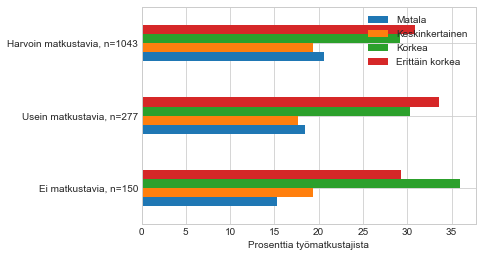

In [16]:
#Koska SELITTÄVÄ muuttuja on kategorinen voidaan ristiintaulukointi havainnollistaa visalisoimalla se pylväskaaviona
##Jos SELITTÄVÄ muuttuja on määrällinen ei silloin ristiintaulukointia muuteta pylväskaavioksi
df2.T.plot.barh()
##Akselit toisin päin olisi ilman "T(ransponointia)" eli "df2.plot.barh()""

#Nimetään x-akseli
plt.xlabel('Prosenttia työmatkustajista')

Text(0.5, 0, 'Prosenttia työmatkustajista')

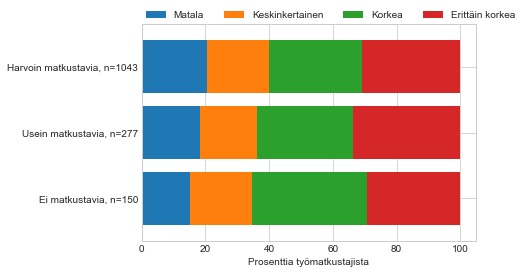

In [17]:
#Muunetaan pylväiden esitystapa pinotuiksi (stack)
##Pylväiden leveyttä kasvattamalla saadaan niiden välinen tyhjä tila pienennettyä
df2.T.plot.barh(stacked = True, width = 0.8)

#Selitteen lokaation sijoittaminen
#Ensimmäinen arvo viittaa koordinaattiin x-akselilla
#Toinen arvo viittaa koordinaattiin y-akselilla
##Selitteen arvojen sijoittaminen eri sarakkeisiin (kuinka monta columnia)
plt.legend(loc = (0, 1), ncol = 4)

plt.xlabel('Prosenttia työmatkustajista')

In [18]:
#Pylväiden taustalla oleva data
df2

,"Ei matkustavia, n=150","Usein matkustavia, n=277","Harvoin matkustavia, n=1043"
Matala,15.333333,18.411552,20.613615
Keskinkertainen,19.333333,17.689531,19.367210
Korkea,36.000000,30.324910,29.146692
Erittäin korkea,29.333333,33.574007,30.872483


(0.0, 100.0)

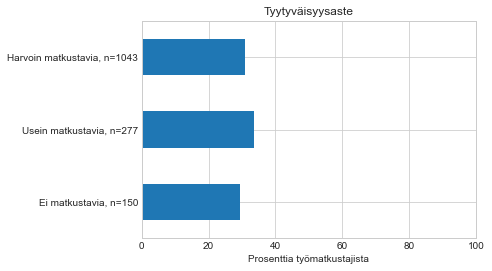

In [19]:
#Muunetaan tieto intuitiivisemmin omaksuttavaan muotoon visualisoimalla erittäin korkean työtyytyväisyyden omaavien rivi
#DataFramen sarakkeeseen viitataan hakasuluilla ja riviin lisäämällä sen eteen tieto "lokaatio" 'Kyllä'
df2.loc['Erittäin korkea'].plot.barh()
plt.title('Tyytyväisyysaste')
plt.xlabel('Prosenttia työmatkustajista')
#X-akselin säätö täyttn 100 prosenttiin
plt.xlim(0,100)

Vaikuttaa siltä, että työmatkustamisella ei olisi merkitystä työtyytyväisyyteen. Kun edetään tällä hetkellä tiedossa olevilla informaatioilla voidaan seuraavaksi

SELITTÄVÄ ANALYTIIKKA (1/2): Selitettävästä kategorisesta muuttujasta voidaan
* laskea Khiin neliö -testi ristiintaulukoinnin osalta

jolla arvioidaan 

Aineistolle esitettävä kysymys: Selitettäessä työtyytyväisyyttä työn puolesta matkustamisella (tai sen puuttumisella) voiko selityksen antama vaikutelma olla

* sattumanvaraista vaihtelua (merkityksetön riippuvuus)

vai olisiko se
* yleistettävissä laajempaan joukoon (merkitsevä riippuvuus)

In [20]:
#Otetaan käyttöön haluttu testi importoimalla kirjasto, josta sitä voidaan hyödyntää 
## https://fi.wikipedia.org/wiki/%CE%A7%C2%B2-testi
from scipy.stats import chi2_contingency
#https://www.scipy.org/
##Scientific Python

#Testi suoritetaan lukumäärätaulukkoon (ei siihen df2 prosenttitaulukkoon)
chi2_contingency(pd.crosstab(df['JobSatisfaction'], df['BusinessTravel']))
#Tuloksessa toisella rivillä on Khiin neliö -testin tulos, joka antaa p-arvoksi "0.5159466426413337"

(5.219803510653503,
 0.5159466426413337,
 6,
 array([[ 29.48979592,  54.45782313, 205.05238095],
        [ 28.57142857,  52.76190476, 198.66666667],
        [ 45.10204082,  83.28843537, 313.60952381],
        [ 46.83673469,  86.49183673, 325.67142857]]))

P-arvo kertoo millä todennäköisyydellä ilmennyt riippuvuus olisi pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta. Tässä tapauksessa <b>ei ole merkitsevää riippuvuutta, koska khiin neliö -testin p-arvo 0.52 > 0.05</b>.

Koska BusinessTravel-muuttuja on tekstimuotoinen ei sitä ilmeisesti voida käyttää sellaisenaan T-testissä, joten tällä kertaa ei kasketaan vertailun vuoksi p-arvoa toisella menetelmällä

Jos SELITTÄVÄ muuttuja on määrällinen käytetään sitä ristiintaulukoinnissa luokiteltuna jakaumana

(kategorisen matkustustiedon sijaan määrällinen ikä eli samankaltainen kysymys)

Aineistolle esitettävä kysymys: Selittääkö työntekijän ikä työtyytyväisyyttä?   

In [21]:
#Tunnuslukukokoelman saa komennolla describe()
df[['Age']].describe()

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


<AxesSubplot:>

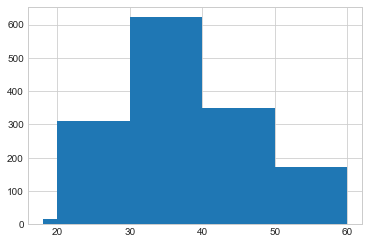

In [22]:
#Määrällinen muuttuja voidaan esittää luokiteltuna jakaumana
##Hyödynnetään tulevaan luokkarajaan aiemmin saadusta viiden luvun yhteenvedosta pienin ja suurin 
luokat = [18,20,30,40,50,60]
df['Age'].hist(bins = luokat)

In [23]:
#Luodaan alkuperäiseen DataFrameen uusi sarake, joka kertoo tyntekijän kuuluvan luokkaan 18-20, 21-30, 31-40 jne.
df['agegroup'] = pd.cut(df['Age'], bins = luokat)

#Ristiintaulukoinnissa annetaan ensin indeksiin sijoitettavat muuttujan arvot ja sitten
#sarakkeisiin sijoitettavat SELITTÄVÄN muuttujan arvot
##Muunnetaan havaintojen esiintyvyys vertailukelpoiseksi (prosenteiksi)
##Lasketaan komennolla "normalize" prosentit ja kerrotaan, että lasketaanko ne indeksistä vai sarakkeista 
df3 = pd.crosstab(df['JobSatisfaction'], df['agegroup'], normalize = 'columns') * 100

#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df3.index = JobSatisfaction

#Yksi desimaali float tyyppisenä
df3.style.format(' {:.1f} %')


agegroup,"(18, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]"
Matala,25.0 %,21.5 %,18.3 %,20.8 %,18.9 %
Keskinkertainen,20.0 %,17.9 %,19.9 %,18.9 %,18.9 %
Korkea,25.0 %,29.9 %,29.6 %,31.4 %,29.4 %
Erittäin korkea,30.0 %,30.7 %,32.3 %,28.9 %,32.9 %


(0.0, 100.0)

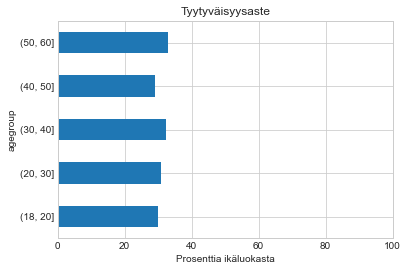

In [24]:
#Muunetaan tieto intuitiivisemmin omaksuttavaan muotoon visualisoimalla erittäin korkean työtyytyväisyyden omaavien rivi
#DataFramen sarakkeeseen viitataan hakasuluilla ja riviin lisäämällä sen eteen tieto "lokaatio" 'Kyllä'
df3.loc['Erittäin korkea'].plot.barh()
plt.title('Tyytyväisyysaste')
plt.xlabel('Prosenttia ikäluokasta')
#X-akselin säätö täyttn 100 prosenttiin
plt.xlim(0,100)

In [25]:
#Tunnuslukukokoelmanhan sai komennolla describe()
df[['Age']].describe()

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


In [26]:
#Selitettävän muuttujan kategorioille voidaan laskea tunnuslukukokoelma SELITTÄVÄN muuttujan määrällisillä arvoilla
df4 = df.groupby('JobSatisfaction') ['Age'].describe()
#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df4.index = JobSatisfaction
#Esitystavassa akselien vaihtaminen eli transponointi ja desimaalien rajaaminen yhteen desimaaliin
df4.T.style.format('{:.1f}')

,Matala,Keskinkertainen,Korkea,Erittäin korkea
count,289.0,280.0,442.0,459.0
mean,36.9,37.0,37.0,36.8
std,9.2,9.0,9.2,9.1
min,19.0,18.0,18.0,18.0
25%,30.0,31.0,30.0,30.0
50%,36.0,36.0,36.0,35.0
75%,42.0,43.0,43.0,43.0
max,60.0,58.0,59.0,60.0


([<matplotlib.axis.XTick at 0x1eba18f9b50>,
 [Text(0, 0, 'Matala'),
  Text(1, 0, 'Keskinkertainen'),
  Text(2, 0, 'Korkea'),
  Text(3, 0, 'Erittäin korkea')])

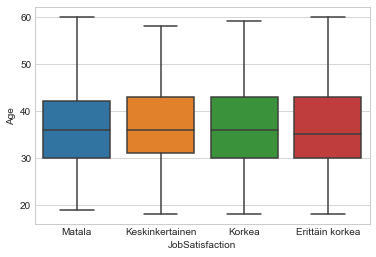

In [27]:
#Määrällisen muuttujan jakauma voidaan visualisoida viiden luvun yhteenvedosta esittämällä se Boxplot:tina
sns.boxplot(data = df, x = 'JobSatisfaction', y = 'Age')

#X-akselin kategorisen muuttujan arvot 1,2,3 ja 4 nimetään aiemmin luodun "survived" listan sisällöllä (indeksit tosin alkaa nollasta)
plt.xticks([0, 1, 2, 3], JobSatisfaction)

Yllä oleva Boxplot esittää janan alemmassa päätepisteessä viiden luvun yhteenvedosta "min", laatikon alareuna on alaneljännes (viivan alapuolella on 25% kaikista), laatikossa on 50% havainnoista, laatikon sisällä oleva viiva on mediaani (mediaanin molemmin puolin on yhtäpaljon havaintoja), laatikon yläreuna on yläneljännes (viivan yläpuolella on 25% kaikista) ja janan ylimmässä päätepisteessä on viiden luvun yhteenvedosta "max". Mikäli janan ulkopuolelle jää poikkeamia (anomaly) ei janan päätepiste silloin tietenkään ollut "min/max" havainto vaan "min/max" anomalia on se "min/max".

Jos alaneljänneksen matka mediaaniin on huomattavasti lyhyempi kuin mediaanin matka yläneljännekseen, sanotaan että jakauma on vino oikealle (vaikka tietty tässä visualisointitavassa alhaalta ylöspäin se olisi "vino ylös" eli "yläpainotteinen")

Aineistolle esitettävä kysymys: Selitettäessä työtyytyväisyyttä työn puolesta matkustamisella (tai sen puuttumisella) voiko selityksen antama vaikutelma olla

* sattumanvaraista vaihtelua (merkityksetön riippuvuus)

vai olisiko se
* yleistettävissä laajempaan joukoon (merkitsevä riippuvuus)

In [28]:
#Luodaan testattavat ryhmät
s0 = df['Age'] [df['JobSatisfaction'] == 0]
s1 = df['Age'] [df['JobSatisfaction'] == 1]

#Otetaan käyttöön haluttu testi importoimalla kirjasto, josta sitä voidaan hyödyntää 
## https://fi.wikipedia.org/wiki/Studentin_t-testi
from scipy.stats import ttest_ind
#https://www.scipy.org/
##Scientific Python

#Suoritetaan testi ryhmien s0 ja s1 välillä 
##"equal_var" kerrotaan oletetaanko määrällisen muuttujan keskihajonta yhtäsuureksi molemmissa testiryhmissä
##omit käsittelee puuttuvat arvot
ttest_ind(s0, s1, equal_var = False, nan_policy = 'omit')
#pvalue=nan eli jostain syystä en saanut toimimaan

Ttest_indResult(statistic=nan, pvalue=nan)

T-testi testaa vertailtavien muuttujien keskiarvoja.

P-arvo kertoo millä todennäköisyydellä ilmennyt riippuvuus olisi pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta. Tässä tapauksessa <b>ei ole merkitsevää riippuvuutta koska riippumattomien otosten t-testin p-arvo X.xx > 0.05</b>

SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan

* kategorisella SELITTÄVÄLLÄ muuttujalla 
	* sen (SELITTÄVÄN muuttujan) määrämissä ryhmissä vertailla tunnuslukuja
	* boxplot
	* T-testi tai Mann-Whitney U -testi (p-arvolle)
	* F-testi tai Kruskal-Wallis -testi
* määrällisellä SELITTÄVÄLLÄ muuttujalla
    * tehdä esitys hajontakaaviona
    * laskea korrelaatiokerroin
    * tehdä korrelaatiokertoimen testaus

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,agegroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,"(40, 50]"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,"(40, 50]"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,"(30, 40]"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,"(30, 40]"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,"(20, 30]"


In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'agegroup'],
      dtype='object')

SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan

* kategorisella SELITTÄVÄLLÄ muuttujalla
    * vertailla tunnuslukuja sen (SELITTÄVÄN muuttujan) määrämissä ryhmissä

Aineistolle esitettävä kysymys: Selittääkö koulutustaso kuukausipalkan suuruutta?

Selittääkö sukupuoli kuukausipalkan suuruutta?

Selittääkö siviilisääty kuukausipalkan suuruutta?



In [31]:
#Sijoitetaan uuteen dataframeen vain ne sarakkeet, joita aiotaan hyödyntää
df5 = df[['Education','Gender','MaritalStatus','MonthlyIncome']]

#Uudelleennimetään sarakkeet
df5.columns = ['Koulutustaso','Sukupuoli','Siviilisääty','Kuukausiansio']
df5.head()

,Koulutustaso,Sukupuoli,Siviilisääty,Kuukausiansio
0,2,Female,Single,5993
1,1,Male,Married,5130
2,2,Male,Single,2090
3,4,Female,Married,2909
4,1,Male,Married,3468


In [32]:
#Luodaan lista, jossa muuttujan mahdollisia arvoja vastaa tarkoituksenmukaisessa järjestyksessä tekstimuotoinen selite 
Education = ['Peruskoulu', '2.aste', 'Kanditaso', 'Maisteritaso', 'Väitellyt']
Gender = ['Mies', 'Nainen']
MaritalStatus = ['Naimaton', 'Aviossa', 'Eronnut']

<font color="grey">
#Samoin kuin aiemmin selitettiin kategorista muuttujaa määräälisellä muuttujalla voidaan se tehdä myös toisinpäin

##Selitettävälle määrälliselle muuttujalle voidaan laskea tunnuslukukokoelma SELITTÄVÄN muuttujan kategorioissa

df6 = df5.groupby('Koulutustaso') ['Kuukausiansio'].describe()

#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista

df6.index = Education

#Akselien vaihtaminen eli transponointi ja desimaalien poistaminen

df6.T.style.format('{:.0f}')
</font>

In [33]:
#Samoin kuin aiemmin selitettiin kategorista muuttujaa määräälisellä muuttujalla voidaan se tehdä myös toisinpäin
##Selitettävälle määrälliselle muuttujalle voidaan laskea tunnuslukukokoelma SELITTÄVÄN muuttujan kategorioissa
df6 = df5.groupby('Koulutustaso') ['Kuukausiansio'].describe()

#Sijoitetaan taulukon indeksiin (selitettävä muuttuja) aiemmin luotu selkokielinen tekstimuotoinen lista
df6.index = Education

#Akselien vaihtaminen eli transponointi ja desimaalien poistaminen
df6.T.style.format('{:.0f}')

,Peruskoulu,2.aste,Kanditaso,Maisteritaso,Väitellyt
count,170,282,572,398,48
mean,5641,6227,6517,6832,8278
std,4485,4525,4817,4657,5061
min,1009,1051,1081,1359,2127
25%,2693,3067,2760,3483,4731
50%,3849,4892,4762,5342,6203
75%,7170,6840,8808,8726,11732
max,19973,19613,19926,19999,19586


In [34]:
#Selitettävän määrällisen muuttujan keskiarvoa voi tarkastella SELITTÄVÄN muuttujan kategorioissa
##Yhteenvetotaulukko eri orientaatioiden (tulokulmien / näkökulmien) mukaan eli pivot-taulukko
###Pivot-taulukko siis laskee keskiarvon ristiintaulukoinnissa kategorioittain
df7 = df.pivot_table(values = 'MonthlyIncome', index = 'Education', columns = 'Gender', margins = True)

#Nimetään pivot-taulukossa esiintyvät kategoristen muuttujien mahdolliset arvot aiemmin luoduilla listoilla
##Pivot-taulukossa on automaattisesti laskettuna myös "All"-sarake, jonka vuoksi se täytyy lisätä graafiseen esitykseen
df7.index = Education + ['Kaikki yhteensä']
df7.columns = Gender + ['Kaikki']

#Desimaalien poistaminen
df7.style.format('{:.0f}')

,Mies,Nainen,Kaikki
Peruskoulu,5781,5564,5641
2.aste,6169,6267,6227
Kanditaso,6811,6313,6517
Maisteritaso,6878,6804,6832
Väitellyt,9241,7463,8278
Kaikki yhteensä,6687,6381,6503


SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan

* kategorisella SELITTÄVÄLLÄ muuttujalla
	* boxplot
    * T-testi (kategorisessa muuttujassa vain kaksi arvoa) tai Mann-Whitney U -testi (p-arvolle)
	* F-testi (kategorisessa muuttujassa enenmmän kuin kaksi arvoa) tai Kruskal-Wallis -testi

Samoin kuin kuvailevassa analytiikassa voidaan selittävässä analytiikassa:

Text(0, 0.5, 'Kuukausipalkka')

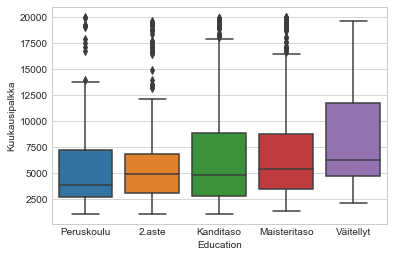

In [35]:
#Määrällisen muuttujan jakauma voidaan visualisoida viiden luvun yhteenvedosta esittämällä se Boxplot:tina ja ryhmitellä tiedot kategoristen muuttujien mukaisesti
sns.boxplot(data = df, x = 'Education', y = 'MonthlyIncome')
#X-akselin kategorisen muuttujan arvot 1, 2, 3, 4 ja 5 nimetään aiemmin luodun listan sisällöllä
plt.xticks([0,1,2,3,4], Education)
#Y-akselin nimeäminen
plt.ylabel('Kuukausipalkka')

Yllä oleva Boxplot esittää janan alemmassa päätepisteessä viiden luvun yhteenvedosta "min", laatikon alareuna on alaneljännes (viivan alapuolella on 25% kaikista), laatikossa on 50% havainnoista, laatikon sisällä oleva viiva on mediaani (mediaanin molemmin puolin on yhtäpaljon havaintoja), laatikon yläreuna on yläneljännes (viivan yläpuolella on 25% kaikista) ja janan ylimmässä päätepisteessä on viiden luvun yhteenvedosta "max". Mikäli janan ulkopuolelle jää poikkeamia (anomaly) ei janan päätepiste silloin tietenkään ollut "min/max" havainto vaan "min/max" anomalia on se "min/max".

Jos alaneljänneksen matka mediaaniin on huomattavasti lyhyempi kuin mediaanin matka yläneljännekseen, sanotaan että jakauma on vino oikealle (vaikka tietty tässä visualisointitavassa alhaalta ylöspäin se olisi "vino ylös" eli "yläpainotteinen")

Text(0, 0.5, 'Kuukausipalkka')

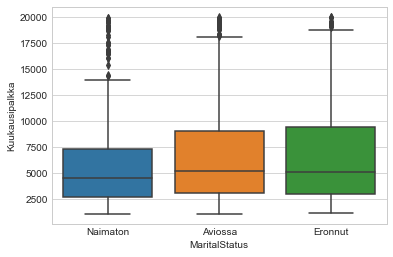

In [36]:
#Samaa voidaan jatkaa muillakin kategorisilla muuttujilla
sns.boxplot(data = df, x = 'MaritalStatus', y = 'MonthlyIncome')
#X-akselin kategorisen muuttujan arvot 1, 2, 3, 4 ja 5 nimetään aiemmin luodun listan sisällöllä
plt.xticks([0,1,2], MaritalStatus)
#Y-akselin nimeäminen
plt.ylabel('Kuukausipalkka')

Text(0, 0.5, 'Kuukausipalkka')

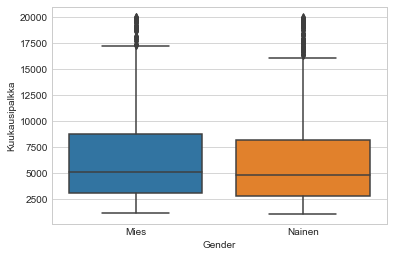

In [37]:
#Samaa voidaan jatkaa muillakin kategorisilla muuttujilla
sns.boxplot(data = df, x = 'Gender', y = 'MonthlyIncome')
#X-akselin kategorisen muuttujan arvot 1, 2, 3, 4 ja 5 nimetään aiemmin luodun listan sisällöllä
plt.xticks([0,1], Gender)
#Y-akselin nimeäminen
plt.ylabel('Kuukausipalkka')

Aineistolle esitettävä kysymys: Selitettäessä palkan suuruutta sukupuolella voiko selityksen antama vaikutelma olla

* sattumanvaraista vaihtelua (merkityksetön riippuvuus)

vai olisiko se
* yleistettävissä laajempaan joukoon (merkitsevä riippuvuus)

<font color ="grey">
<b>Metsään menneitä kokeiluja</b>
<br />
#Otetaan muokattavaksi uusi muuttuja, johon sijoitetaan alkuperäinen Data Frame
<br />
df8 = df
<br />
#Lisätään muuttujaan uusi sarake, joka kertoo siviilisäädyn numeromuodossa
<br />
df8['Siv.saa'] = df['MaritalStatus'].map(
<br />
{'Single':0,
<br />
'Married':1,
<br />
'Divorced':2},
<br />
na_action=None)
<br />
<br />
df8['Siv.saa'].astype(int)
<br />
<br />
s0 = df8['MonthlyIncome'] [df['Siv.saa'] == 0]
<br />
s1 = df8['MonthlyIncome'] [df['Siv.saa'] == 1]
<br />
s2 = df8['MonthlyIncome'] [df['Siv.saa'] == 2]
<br />
<br />    
from scipy.stats import ttest_ind
<br />
<br />
ttest_ind(s0, s1, s2, equal_var = False, nan_policy = 'omit')
</font>

In [38]:
#Luodaan testattavat ryhmät
s0 = df['MonthlyIncome'] [df['Gender'] == 'Male']
s1 = df['MonthlyIncome'] [df['Gender'] == 'Female']

#Otetaan käyttöön haluttu testi importoimalla kirjasto, josta sitä voidaan hyödyntää 
## https://fi.wikipedia.org/wiki/Studentin_t-testi
from scipy.stats import ttest_ind
#https://www.scipy.org/
##Scientific Python

#Suoritetaan testi ryhmien s0 ja s1 välillä 
##"equal_var" kerrotaan oletetaanko määrällisen muuttujan keskihajonta yhtäsuureksi molemmissa testiryhmissä
##omit käsittelee puuttuvat arvot
ttest_ind(s0, s1, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-1.2222619989669412, pvalue=0.22183687764870916)

T-testi testaa vertailtavien muuttujien keskiarvoja.

P-arvo kertoo millä todennäköisyydellä ilmennyt riippuvuus olisi pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta. Tässä tapauksessa <b>ei ole merkitsevää riippuvuutta koska riippumattomien otosten t-testin p-arvo 0.22 > 0.05</b>

In [39]:
#Luodaan testattavat ryhmät
##Mikäli tarkasteltavassa kohteessa (selitettävä muuttuja) on tyhjiä rivejä tulee ne pudottaa pois
###df.dropna(subset = ['MonthlyIncome'])
k1 = df['MonthlyIncome'] [df['Education'] == 1] # peruskoulu
k2 = df['MonthlyIncome'] [df['Education'] == 2] # 2. aste
k3 = df['MonthlyIncome'] [df['Education'] == 3] # korkeakoulu
k4 = df['MonthlyIncome'] [df['Education'] == 4] # ylempi korkeakoulu
k5 = df['MonthlyIncome'] [df['Education'] == 5] # väitellyt

#Otetaan käyttöön haluttu testi importoimalla kirjasto, josta sitä voidaan hyödyntää 
## https://en.wikipedia.org/wiki/F-test
from scipy.stats import f_oneway
#https://www.scipy.org/
##Scientific Python

#Suoritetaan testi ryhmien k1, k2, k3 ja k4 välillä 
f_oneway(k1, k2, k3, k4, k5)

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

F-testi testaa vertailtavien muuttujien keskiarvoja.

P-arvo kertoo millä todennäköisyydellä ilmennyt riippuvuus olisi pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta. Tässä tapauksessa <b>riippuvuus on merkitsevä, koska f-testin p-arvo 0.003 < 0.05</b>

SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan
* määrällisellä SELITTÄVÄLLÄ muuttujalla
    * tehdä esitys hajontakaaviona

Aineistolle esitettävä kysymys: Selittääkö ikä kuukausipalkan suuruutta?

Selittääkö yrityksen palkkalistoilla olemisen kesto kuukausipalkan suuruutta?

Selittääkö työuranpituus kuukausipalkan suuruutta?


In [40]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'agegroup'],
      dtype='object')

In [41]:
#Sijoitetaan uuteen dataframeen vain ne sarakkeet, joita aiotaan hyödyntää
df8 = df[['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany']]

#Uudelleennimetään sarakkeet
df8.columns = ['Ikä','Kuukausiansio','Työuranpituus','Yrityksessä']
df8.head()

,Ikä,Kuukausiansio,Työuranpituus,Yrityksessä
0,41,5993,8,6
1,49,5130,10,10
2,37,2090,7,0
3,33,2909,8,8
4,27,3468,6,2


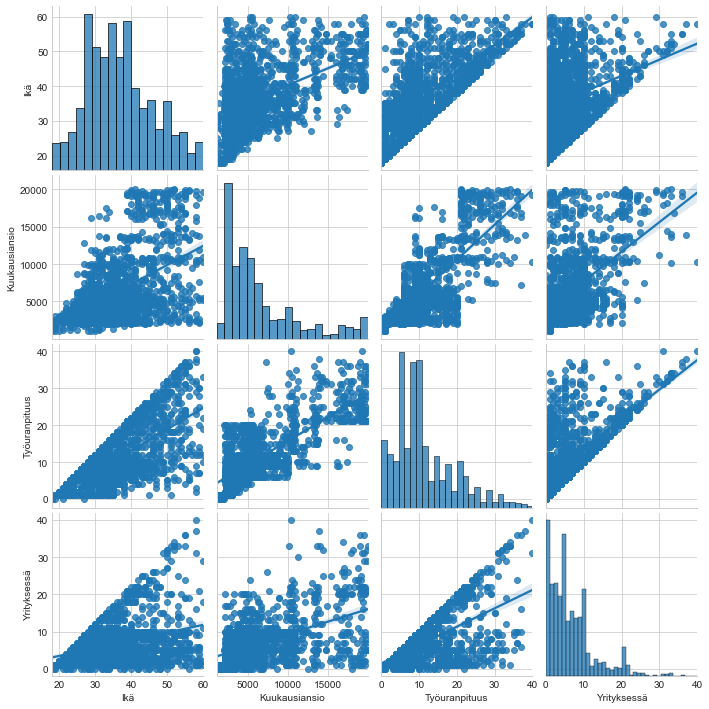

In [42]:
#Hajontakaaviossa trendin saa mukaan komennolla kind = 'reg' 
sns.pairplot(df8, kind = 'reg')
#Muuttuja itsessään esitetään histogrammina, josta ilmenee sen jakauma

SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan
* määrällisellä SELITTÄVÄLLÄ muuttujalla
    * laskea korrelaatiokerroin

In [43]:
#Mitä kauempana nollasta sitä suurempi korrelaatio (positiivinen korrelaatio tarkoittaa että kun toinen kasvaa niin myös toinen kasvaa)
korrelaatiot = df8.corr()
korrelaatiot

,Ikä,Kuukausiansio,Työuranpituus,Yrityksessä
Ikä,1.000000,0.497855,0.680381,0.311309
Kuukausiansio,0.497855,1.000000,0.772893,0.514285
Työuranpituus,0.680381,0.772893,1.000000,0.628133
Yrityksessä,0.311309,0.514285,0.628133,1.000000


Korrelaatiokertoimen osalta yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

<AxesSubplot:>

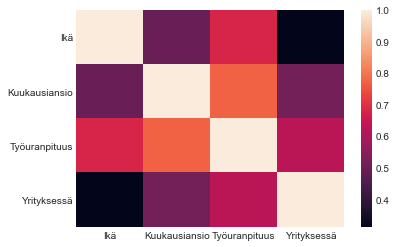

In [44]:
#Yllä olevan taulukon eri solujen värjäys
sns.heatmap(korrelaatiot)
#Mitä kirkkaampi punainen sitä suurempi korrelaatio

<AxesSubplot:>

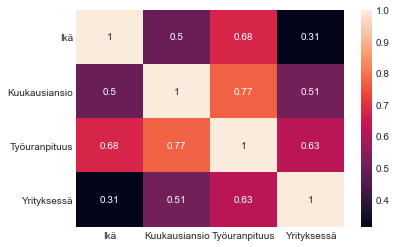

In [45]:
#Lisäämällä HeatMap:piin "annot = True" lisätään värjättyihin soluihin ne arvot, joiden perusteella väritys on suoritettu
sns.heatmap(korrelaatiot, annot = True)
#Oranssin kertoo, että muuttujien välillä on selvä suoraviivainen riippuvuus

SELITTÄVÄ ANALYTIIKKA (2/2): Selitettävästä määrällisestä muuttujasta voidaan
* määrällisellä SELITTÄVÄLLÄ muuttujalla
    * tehdä hajontakaavion ja korrelaatiokertoimen testaus

Voiko korrelaation antama vaikutelma olla
* sattumanvaraista vaihtelua (merkityksetön riippuvuus)

vai olisiko se
* yleistettävissä laajempaan joukoon (merkitsevä riippuvuus)

In [46]:
#Otetaan käyttöön haluttu testi importoimalla kirjasto, josta sitä voidaan hyödyntää 
from scipy.stats import pearsonr
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
#https://www.scipy.org/
##Scientific Python

for oma_keksima_muuttujan_nimi in df8:
    #Poistetaan tyhjät arvot läpikäytävästä muuttujasta ja Kuukausiansiosta
    df8_putsattu_not_null_dropna = df8.dropna(subset=[oma_keksima_muuttujan_nimi, 'Kuukausiansio'])
    
    #Tulostetaan näytölle muuttujan arvo kerrelaatiokertoimen testauksen jälkeen 
    print(oma_keksima_muuttujan_nimi,
        #Lasketaan pearsonr-testillä muuttujan "Kuukausiansio"  ja silmukoinnissa vuorossa olevan muuttujan välinen p-arvo 
          pearsonr(
              df8_putsattu_not_null_dropna ['Kuukausiansio'], df8_putsattu_not_null_dropna[oma_keksima_muuttujan_nimi]
                  ))

Ikä (0.49785456692658037, 6.669539203000551e-93)
Kuukausiansio (1.0, 0.0)
Työuranpituus (0.7728932462543561, 2.7293476156925204e-292)
Yrityksessä (0.5142848257331967, 4.819313789732479e-100)


P-arvo kertoo millä todennäköisyydellä ilmennyt riippuvuus olisi pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta. 

Tapauksessa Yrityksessä (työskentely vuodet) ja Kuukausiansio korrelaatiokerroin oli 0.628 ja sille saatu p-arvo reilusti alle 0,05, koska lopussa oleva 5091e-162 potenssi merkintä tarkoittaa sitä, että ensimmäinen numero (tässä tapauksessa kolme) on vasta 162. numero desimaalipilkun jälkeen
* Tässä tapauksessa <b>riippuvuus on merkitsevä, koska pearsonr -testin p-arvo on alle 0,05</b>.
* (Sama koskee (kokonais)Työuranpituutta: <b>riippuvuus on merkitsevä, koska pearsonr -testin p-arvo on alle 0,05</b>, mutta korrelaatiokerroin ei ole kovin lähellä yhtä, joten positiivinen riippuvuus ei ole kovin korkea)




In [47]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')

Lopeteltu 2021-05-03 14:08:35.539969
